<font color="#e30b5d"><h1>Regression</h1></font>

In this part, you will get a brief intro to regression. You will learn about **Linear**, **Non-linear**, **Simple** and **Multiple regression**, and their applications. You will apply these methods to a insurance dataset to predict individual medical costs billed by health insurance. Also, you will learn how to evaluate your regression model, and calculate its accuracy.



#### Dependent, and Independent Variables:
In regression, there are two types of variables:<br>

- A dependent variable (State/Target/Goal) notated by Y. This is our label.
- One or more independent variables or explanatory variables (Causes of those states) notated by X. This is one or more attributes.

Independent variables can be either categorical or continuous, but dependent variables have to be continuous


<font color="#9a083f"><h3>Types of regression models</h3></font>

#### Simple Regression: 
( one independent variable, one dependent variable)
- Simple Linear Regression
- Simple Non-linear Regression

(Linearity is based on natural relationship between independent and dependent variables)


#### Multiple Regression:
( multiple independent variables, one dependent variable)
- Multiple Linear Regression
- Multiple Non-linear Regression


<font color="#9a083f"><h3> Regression Algorithms</h3></font>

- Linear Regression
- Ridge Regression
- Neural Network Regression 
- Lasso Regression 
- Decision Tree Regression 
- Random Forest
- KNN Model 
- Support Vector Machines (SVM)
- ...


<font color="#e30b5d"><h1>Linear Regression</h1></font>

A linear model makes a prediction by simply computing a weighted sum of the input features, plus a constant called the bias term (also called the intercept term)

$$
\hat{y} = \theta_1 x_1 + ... + \theta_n x_n + \theta_0
$$

* $\hat{y}$ is the predicted value
* $x_i$ is the ith feature value
* $\theta_j$ is the jth model parameter 
* $x_0 = 1$ is constant
* $n$ is the number of features

Okay, that’s the Linear Regression model, so now how do we train it? Well, recall that training a model means setting its parameters so that the model best fits the training set. For this purpose, we first need a measure of how well (or poorly) the model performs(in this case predicts).

The most common performance measure of a regression model is the Mean Square Error (MSE)
$$
MSE(\chi, \theta) = \frac{1}{2m}\sum_{i=1}^{m} (\hat{y}^{i} - y^{i})^2
$$
$$
MSE(\chi, \theta) = \frac{1}{2m}\sum_{i=1}^{m} (\theta^{T}x^{i} - y^{i})^2
$$

* $\chi = \{ x^{q}, y^{q}\}_{q=1}^{m}$

* $m$ is the number of data points

<font color="#9a083f"><h3> The Normal Equation </h3></font>

To find the value of θ that minimizes the cost function, there is a closed-form solution —in other words, a mathematical equation that gives the result directly. This is called the Normal Equation 

$$
\hat{\theta} = (X^T X)^{-1} X^T Y
$$

* $\hat{\theta}$ is the model parametes $\theta_0 , \theta_1, ... , \theta_n $
* $Y_i$ is the ith target value among m targets
* $X = \begin{bmatrix}
{x^{(1)}}^{T}\\
...\\
{x^{(m)}}^{T}\\
\end{bmatrix}$

Visit
<a href="https://eli.thegreenplace.net/2014/derivation-of-the-normal-equation-for-linear-regression/">here</a>
for detailed deriviation of Normal equation.

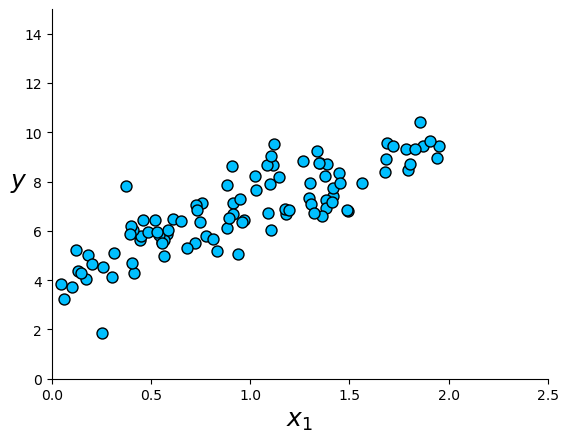

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import warnings

def printl(string, y = 1, size = 16):
    ax = plt.axes([0,0,0.3,0.3]) #left,bottom,width,height
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis('off')
    plt.text(0, y, f'{string}', size = size, color = "black")

warnings.filterwarnings('ignore')    
np.random.seed(3)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

axs = plt.subplot(1, 1, 1)
axs.spines['right'].set_visible(False)
axs.spines['top'  ].set_visible(False)

plt.scatter(X, y, color = '#00bfff', s = 250, marker = '.', edgecolor = 'black')
plt.xlabel("$x_1$", fontsize = 18)
plt.ylabel("$y$", rotation = 0, fontsize = 18)
plt.axis([0, 2.5, 0, 15]);

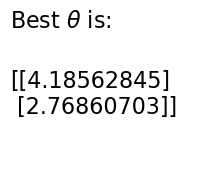

In [2]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
best_theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
printl(r'Best $\theta$ is:',size=16)
printl(best_theta,.4)

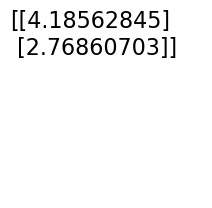

In [3]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
theta=np.array([np.round(lin_reg.intercept_,8), np.round(lin_reg.coef_,8)])
printl(theta)

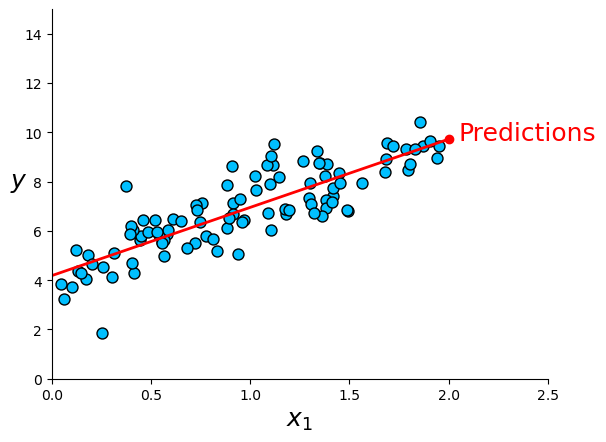

In [6]:
X_new = np.linspace(0, 2, 100).reshape(100, 1) # 100 linearly seperated points
X_new_b = np.c_[np.ones((100, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(best_theta)
axs = plt.subplot(1, 1, 1)
axs.spines['right'].set_visible(False)
axs.spines['top'  ].set_visible(False)
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.scatter(X_new[-1],y_predict[-1],color='r')
plt.text(X_new[-1]+0.05,y_predict[-1]-0.02,"Predictions",size=18,c='r')
plt.scatter(X, y,color='#00bfff',s=250,marker='.',edgecolor='black')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2.5, 0, 15]);

<font color="#e30b5d"><h1>Gradient Descent</h1></font>

Gradient Descent is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.
$\newline$
<center>
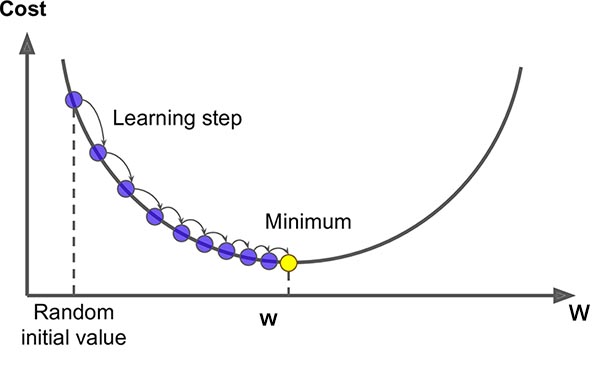
</center>
An important parameter in Gradient Descent is the size of the steps, determined by the learning rate hyperparameter. If the learning rate is too small, then the algorithm will have to go through many iterations to converge, which will take a long time

On the other hand, if the learning rate is too high, you might jump across the valley and end up on the other side, possibly even higher up than you were before. This might make the algorithm diverge, with larger and larger values, failing to find a good solution 



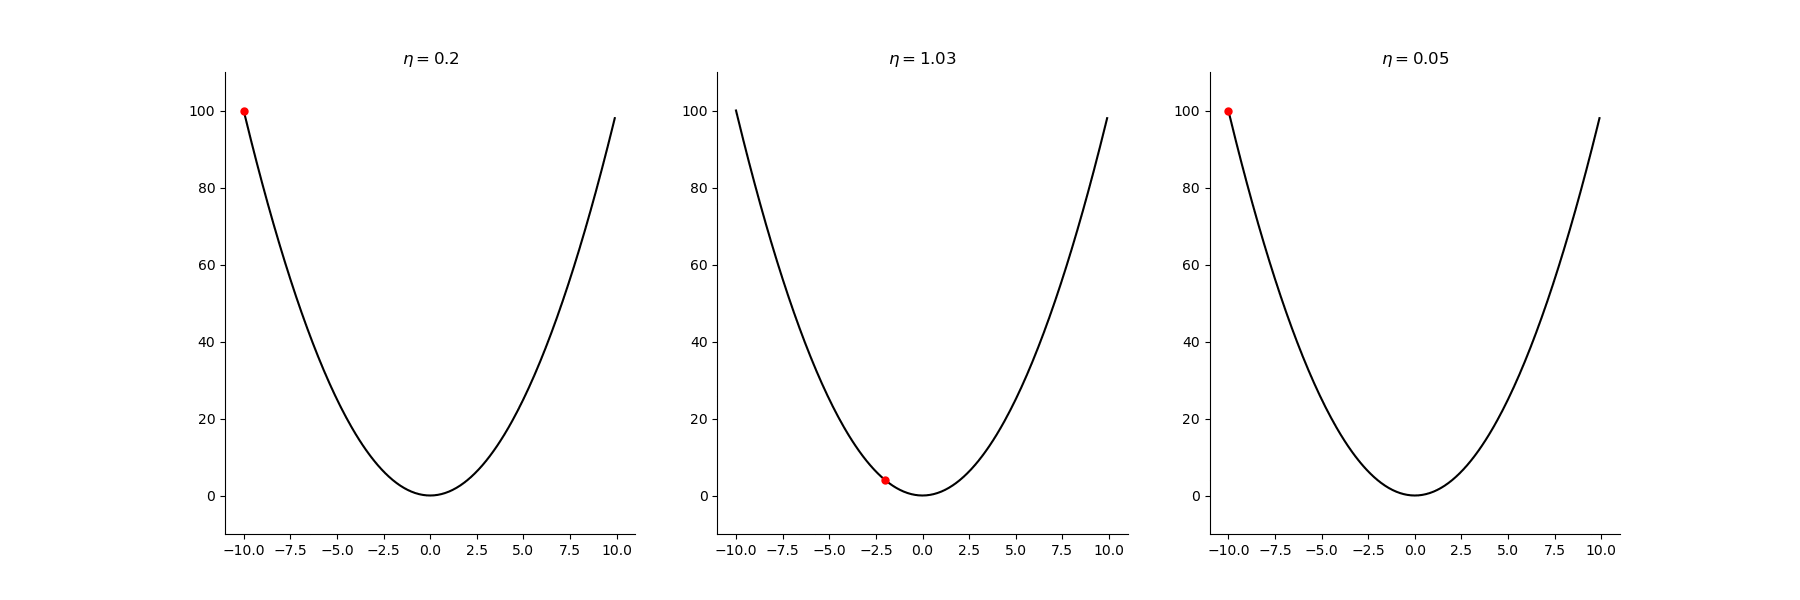

<font color="#e30b5d"><h1>Batch Gradient Descent</h1></font>

Batch gradient descent computes the gradient of the objective function / cost function $J(\theta)$ with respect to the parameters $\theta$ on the entire training data-set.

$$\theta := \theta - \alpha \cdot \bigtriangledown_\theta J(\theta)$$

As all the gradients for the whole data-set need to be calculated to perform one single update, batch gradient descent can be very slow. Furthermore it can be impracticable for larger data-sets that don't fit into working memory.

To implement Gradient Descent, you need to compute the gradient of the cost function with regards to each model parameter $\theta_j$.This is called a partial derivative.

$$\frac{\partial}{\partial \theta_{j}} \operatorname{MSE}(\boldsymbol{\theta})=\frac{2}{m} \sum_{i=1}^{m}\left(\boldsymbol{\theta}^{T} \mathbf{x}^{(i)}-y^{(i)}\right) x_{j}^{(i)}$$

if you rewrite the equation in vector form ...

$$
\nabla_{\boldsymbol{\theta}} \operatorname{MSE}(\boldsymbol{\theta})=\left(\begin{array}{c}
\frac{\partial}{\partial \theta_{0}} \operatorname{MSE}(\boldsymbol{\theta}) \\
\frac{\partial}{\partial \theta_{1}} \operatorname{MSE}(\boldsymbol{\theta}) \\
\vdots \\
\frac{\partial}{\partial \theta_{n}} \operatorname{MSE}(\boldsymbol{\theta})
\end{array}\right)=\frac{2}{m} \mathbf{X}^{T}(\mathbf{X} \boldsymbol{\theta}-\mathbf{y})
$$

Once you have the gradient vector, which points uphill, just go in the opposite direc‐ tion to go downhill.

$$
\theta^{(\text {next step })}=\theta-\eta \nabla_{\theta} \operatorname{MSE}(\theta)
$$












[[-0.51112899]
 [-0.12284341]]


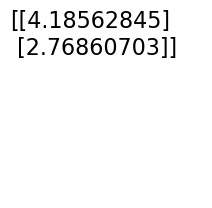

In [7]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # random initialization
print(theta)
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
printl(theta)

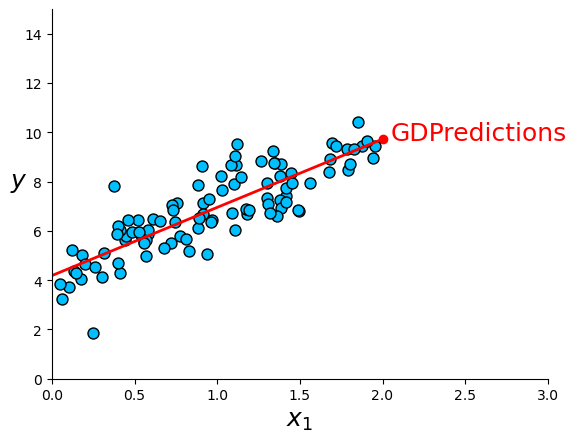

In [8]:
y_predict = X_new_b.dot(theta)
axs = plt.subplot(1, 1, 1)
axs.spines['right'].set_visible(False)
axs.spines['top'  ].set_visible(False)
plt.plot(X_new, y_predict, "r-", linewidth=2, label="GD Predictions")
plt.scatter(X_new[-1],y_predict[-1],color='r')
plt.text(X_new[-1]+0.05,y_predict[-1]-0.02,"GDPredictions",size=18,c='r')
plt.scatter(X, y,color='#00bfff',s=250,marker='.',edgecolor='black')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 3, 0, 15]);

<font color="#9a083f"><h3>The Importance of Learning rate</h3></font>

In [9]:
theta_path_bgd = []

def plot_gradient_descent(axs,theta, eta, theta_path=None):
    m = len(X_b)
    axs.scatter(X, y,color='#00bfff',s=250,marker='.',edgecolor='black')
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            axs.plot(X_new, y_predict, style,alpha=0.5)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    axs.set_xlabel("$x_1$", fontsize=18)
    axs.axis([0, 2, 0, 15])
    axs.set_title(r"$\eta = {}$".format(eta), fontsize=16)

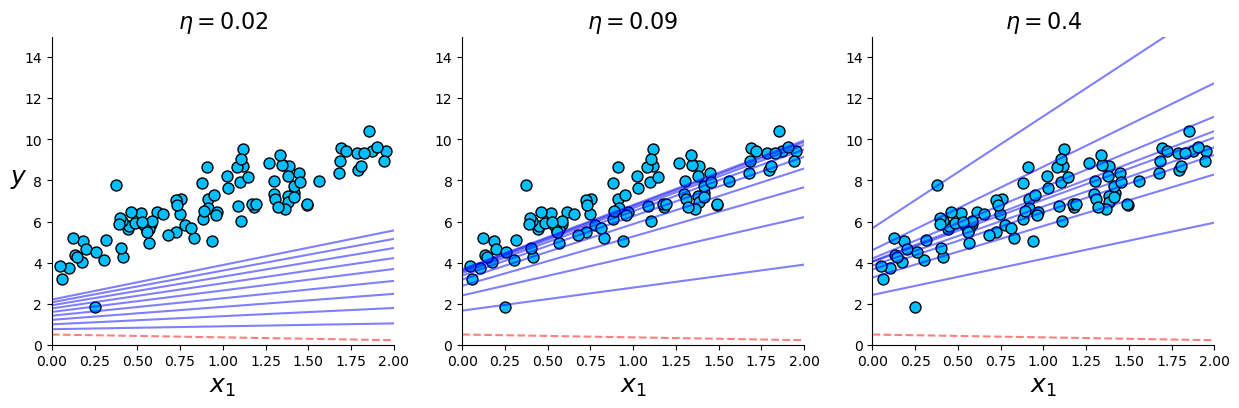

In [10]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization
fig,axs = plt.subplots(1,3,figsize=(15,4))
for i in range(3):
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['top'  ].set_visible(False)
plot_gradient_descent(axs[0],theta, eta=0.02)
axs[0].set_ylabel("$y$", rotation=0, fontsize=18)
plot_gradient_descent(axs[1],theta, eta=0.09, theta_path=theta_path_bgd)
plot_gradient_descent(axs[2],theta, eta=0.4)

<font color="#e30b5d"><h1>Stochastic Gradient Descent </h1></font>

The main problem with Batch Gradient Descent is the fact that it uses the whole training set to compute the gradients at every step, which makes it very slow when the training set is large. At the opposite extreme, Stochastic Gradient Descent  just picks a random instance in the training set at every step and computes the gradients based only on that single instance. Obviously this makes the algorithm much faster since it has very little data to manipulate at every iteration. It also makes it possible to train on huge training sets, since only one instance needs to be in memory at each iteration.

<center>
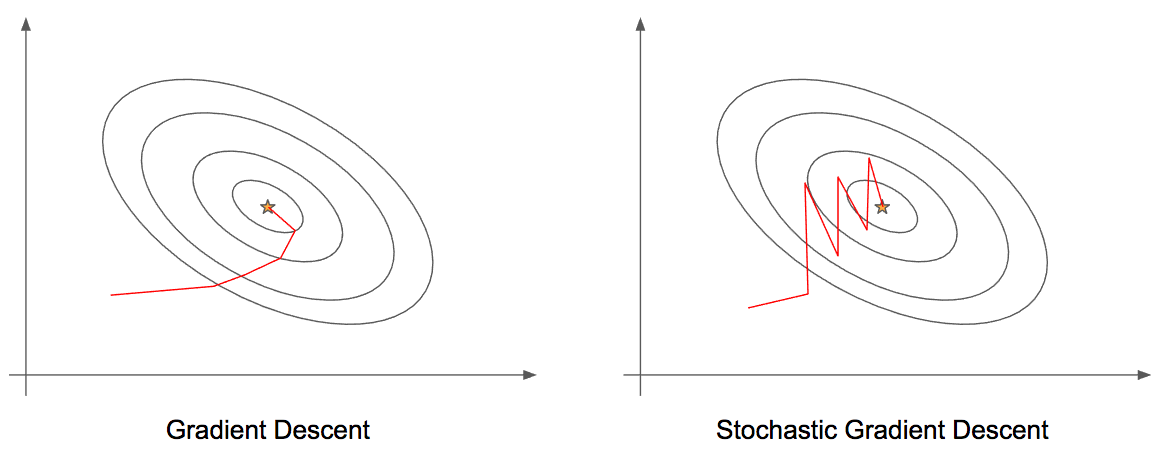
</center>

Stochastic gradient descent (SGD), on the other hand, performs a parameter update for each training example $x^{(i)}$ and label $y^{(i)}$.

$$\theta := \theta - \alpha \cdot \bigtriangledown_\theta J(\theta;x^{(i)};y^{(i)})$$

Batch gradient descent performs redundant gradient computations as it recomputes gradients for similar examples before performing a parameter update. SGD doesn't have the same redundancy as it updates for each training example, which is why it's usually much faster than batch gradient descend. Furthermore, it can also be used for online learning.

Performing a parameter update with only one training example can lead to high variance, which can cause the objective function to fluctuate.

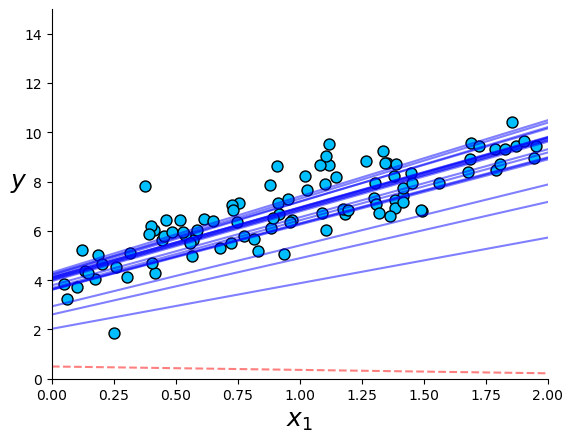

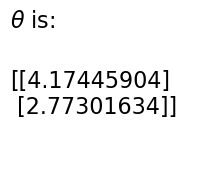

In [11]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization
fig,axs = plt.subplots(1,1)
axs.spines['right'].set_visible(False)
axs.spines['top'  ].set_visible(False)
for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                   
            y_predict = X_new_b.dot(theta)           
            style = "b-" if i > 0 else "r--"         
            axs.plot(X_new, y_predict, style,alpha=0.5)        
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta) 
        

axs.scatter(X, y,color='#00bfff',s=250,marker='.',edgecolor='black')                                
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15])                             
plt.show()

printl(r'$\theta $ is:')
printl(theta,.4)

<font color="#9a083f"><h3>Using SGD Regressor in sklearn</h3></font>

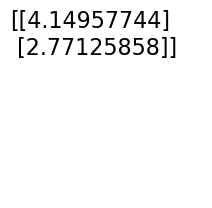

In [12]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

theta=np.array([np.round(sgd_reg.intercept_,8), np.round(sgd_reg.coef_,8)])
printl(theta)

<font color="#e30b5d"><h1>Mini-batch gradient descent</h1></font>

It is quite simple to understand once you know Batch and Stochastic Gradient Descent: at each step, instead of computing the gradients based on the full training set (as in Batch GD) or based on just one instance (as in Stochastic GD), Mini-batch GD computes the gradients on small random sets of instances called mini-batches. The main advantage of Mini-batch GD over Stochastic GD is that you can get a performance boost from hardware optimization of matrix operations, especially when using GPUs. 

<center>
    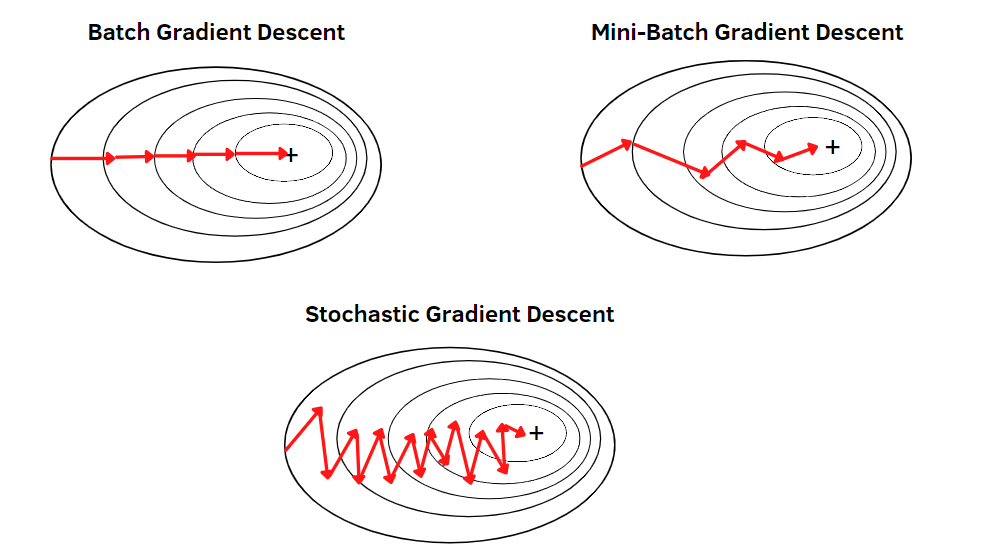
</center>

Mini-batch gradient descent combines the advantages of SGD and batch gradient descent by performing parameter updates for every mini-batch of $n$ training examples.

$$\theta := \theta - \alpha \cdot \bigtriangledown_\theta J(\theta;x^{(i:i+n)};y^{(i:i+n)})$$

By performing the parameter update on a mini-batch, it 

<b>a)</b> reduces the variance of the update, which can lead to more stable convergence, and 

<b>b)</b> can make use of highly optimized matrix calculates commonly found in state-of-the-art deep learning libraries.

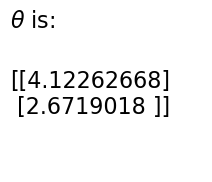

In [13]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)
        
printl(r'$\theta$ is:')
printl(theta,.4)

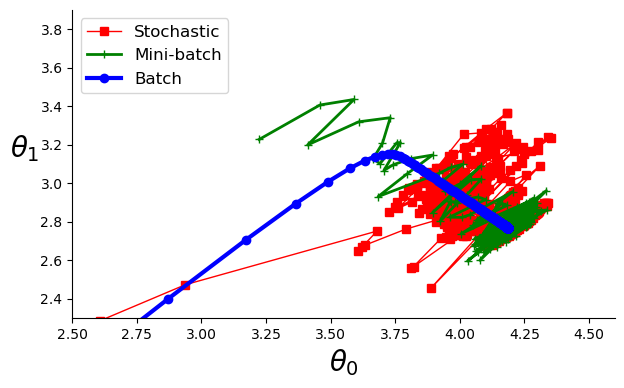

In [14]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)
fig,axs = plt.subplots(1,1,figsize=(7,4))
axs.spines['right'].set_visible(False)
axs.spines['top'  ].set_visible(False)
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=12)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
axs.axis([2.5, 4.6, 2.3, 3.9])
plt.show()

<font color="#9a083f"><h3>Accuracy Metrics for model evaluation</h3></font>

Evaluation metrics, provide a key role in the development of a model. They provide insight into areas that require improvement.

Some commonly used metrics in regression are:

- **Mean Absolute Error**
<br>
$MAE = \frac{1}{n}|Y_i-\hat{Y_i}|$
<br>
Simple average error


- **Mean Squared Error**
<br>
$MSE = \frac{1}{n}\sum_{i=1}^{n}(Y_i-\hat{Y_i})^2$
<br>
More popular since it focuses on large errors


- **Root Mean Squared Error**
<br>
$RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(Y_i-\hat{Y_i})^2}$
<br>
One of the most popular, since it is interpretable in the same units as Y making it easy to relate its information


- **Relative Absolute Error**
<br>
$RAE = \frac{\sum{|Y_i - \hat{Y_i}|}}{\sum{|y_i-\bar{Y_i}|}}$


- **Relative Squared Error**
<br>
$RSE = \frac{\sum{(Y_i - \hat{Y_i})^2}}{\sum{(y_i-\bar{Y_i})^2}}$


- $R^2$  **(Not an error)**
<br>
A popular metric for the accuracy. Shows how close the data values are to the fitted regression line.

$R^2 = 1 - RSE$

Each metric can be used for quantifying our predictions. The choice of metric completely depends on the type of model, data, and domain of knowledge

**Medical cost dataset**


The dataset consists of age, sex, BMI(body mass index), children, smoker and region feature, which are independent and charge as a dependent feature. We will predict individual medical costs billed by health insurance.

In [13]:
# Import library
import pandas  as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [14]:
# Import dataset
df = pd.read_csv('insurance.csv')
print('\nNumber of rows and columns in the data set: ',df.shape)
print('')

#Lets look into top few rows and columns in the dataset
df.head()


Number of rows and columns in the data set:  (1338, 7)



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Encoding**

Machine learning algorithms cannot work with categorical data directly, categorical data must be converted to number.

- Label Encoding
- One hot encoding
- Dummy variable trap

**Label encoding**  is a popular encoding technique for handling categorical variables. In this technique, each label is assigned a unique integer based on alphabetical ordering.

A **One hot encoding** is a representation of categorical variable as binary vectors.It allows the representation of categorical data to be more expresive. This first requires that the categorical values be mapped to integer values, that is label encoding. Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.

The **Dummy variable trap** is a scenario in which the independent variable are multicollinear, a scenario in which two or more variables are highly correlated in simple term one variable can be predicted from the others.

By using **pandas get_dummies function** we can do all above three step in line of code. We will this fuction to get dummy variable for sex, children,smoker,region features. By setting drop_first =True function will remove dummy variable trap by droping one variable and original variable.The pandas makes our life easy.


Visit
<a href="https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/">here</a>
for more details.

In [15]:
# Dummy variable
categorical_columns = ['sex','children', 'smoker', 'region']
df_encode = pd.get_dummies(data = df, prefix = 'OHE', prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
              dtype='int8')

In [16]:
# Lets verify the dummay variable process
print('Columns in original data frame:\n',df.columns.values)
print('\nNumber of rows and columns in the dataset:',df.shape)
print('\nColumns in data frame after encoding dummy variable:\n',df_encode.columns.values)
print('\nNumber of rows and columns in the dataset:',df_encode.shape)

Columns in original data frame:
 ['age' 'sex' 'bmi' 'children' 'smoker' 'region' 'charges']

Number of rows and columns in the dataset: (1338, 7)

Columns in data frame after encoding dummy variable:
 ['age' 'bmi' 'charges' 'OHE_male' 'OHE_1' 'OHE_2' 'OHE_3' 'OHE_4' 'OHE_5'
 'OHE_yes' 'OHE_northwest' 'OHE_southeast' 'OHE_southwest']

Number of rows and columns in the dataset: (1338, 13)


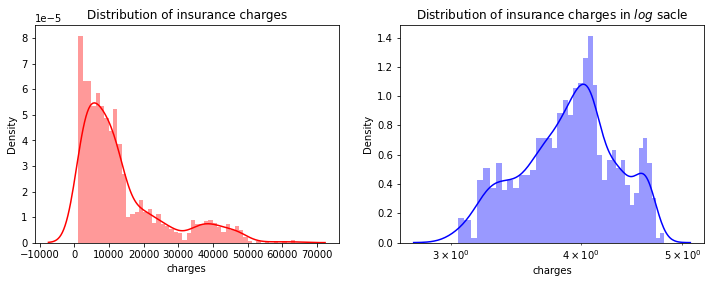

In [17]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(df['charges'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

ax=f.add_subplot(122)
sns.distplot(np.log10(df['charges']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in $log$ sacle')
ax.set_xscale('log');



If we look at the left plot the charges varies from 1120 to 63500, the plot is right skewed. In right plot we will apply natural log, then plot approximately tends to normal. for further analysis we will apply log on target variable charges.


In [18]:
## Log transform
df_encode['charges'] = np.log(df_encode['charges'])

In [19]:
from sklearn.model_selection import train_test_split
X = df_encode.drop('charges',axis=1) # Independet variable
y = df_encode['charges'] # dependent variable
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [20]:
#Scikit Learn module
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) # Note: x_0 =1 is no need to add, sklearn will take care of it.


LinearRegression()

In [22]:
from sklearn import metrics
# sklearn regression module
y_pred_sk = lin_reg.predict(X_test)

y_test_hat  = lin_reg.predict(X_test)
y_train_hat = lin_reg.predict(X_train)

print("\n"+10*'-',"{Train} "+10*'-')
print('R^2:',round(metrics.r2_score(y_train, y_train_hat),3))
print('MAE:',round(metrics.mean_absolute_error(y_train, y_train_hat),3))
print('MSE:',round(metrics.mean_squared_error(y_train, y_train_hat),3))
print('RMSE:',round(np.sqrt(metrics.mean_squared_error(y_train, y_train_hat)),3))

print("\n"+10*'-',"{Test} "+10*'-')
print('R^2:',round(metrics.r2_score(y_test, y_test_hat),3))
print('MAE:',round(metrics.mean_absolute_error(y_test, y_test_hat),3))
print('MSE:',round(metrics.mean_squared_error(y_test, y_test_hat),3))
print('RMSE:',round(np.sqrt(metrics.mean_squared_error(y_test, y_test_hat)),3))



---------- {Train} ----------
R^2: 0.764
MAE: 0.285
MSE: 0.198
RMSE: 0.445

---------- {Test} ----------
R^2: 0.78
MAE: 0.286
MSE: 0.187
RMSE: 0.433


In order to **validated model** we need to check few assumption of linear regression model:

 1.Linear Relationship: In linear regression the relationship between the dependent and independent variable to be linear. This can be checked by scatter ploting Actual value Vs Predicted value.

 2.The residual error plot should be normally distributed and the mean of residual error should be 0 or close to 0 as much as possible.

 3.Linear regession assumes that there is little or no Multicollinearity in the data. Multicollinearity occurs when the independent variables are too highly correlated with each other. The variance inflation factor VIF* identifies correlation between independent variables and strength of that correlation. VIF=11−R2, If VIF >1 & VIF <5 moderate correlation, VIF < 5 critical level of multicollinearity.


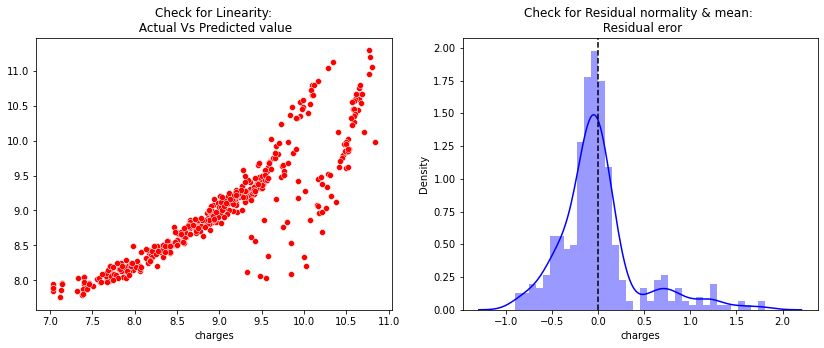

In [23]:
import scipy as sp
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,y_pred_sk,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y_test - y_pred_sk),ax=ax,color='b')
ax.axvline((y_test - y_pred_sk).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');


In [26]:
# Check for Multicollinearity
#Variance Inflation Factor
VIF = 1/(1-(metrics.r2_score(y_test, y_test_hat)))
VIF

4.536561945911135


<font color="#e30b5d"><h1>Non-Linear Regression</h1></font>

If the observed relationship is non-linear, we will use Non-Linear Regression. We should always try to fit a regression that fits the data the best.

<center>
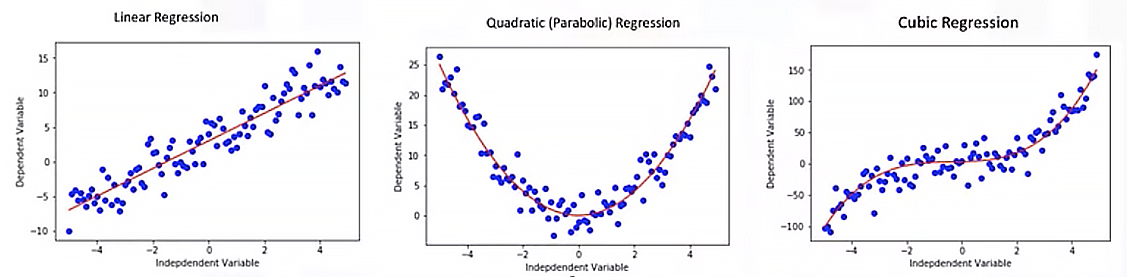
</center>

**Types of Non-Linear Regression:**
- Polynomial Regression
- General Non-Linear Regression

When data shows a curvy or in a broader term, non-linear trend, linear regression will not produce accurate results compared to a non-linear regression model.
You can express the relationship between X and Y by any non-linear function that you can think of! 
You should examine your data closely and after observing the non-linear relationship choose, a non-linear function that works best with it. We should always try to apply domain knowledge on our data when we can.

<font color="#9a083f"><h3>Some examples of non-linearities</h3></font>

Linear: $$ Y = aX+b $$

Quadratic: $$ Y = aX^2+bX+c $$

Cubic: $$ Y = aX^3+bX^2+cX^3+d $$

Exponential: $$ Y = a + b c^X $$

Logarithmic: $$ y = \log(X)$$

Sigmoidal(Logistic): $$ Y = a + \frac{b}{1+ c^{(X-d)}}$$

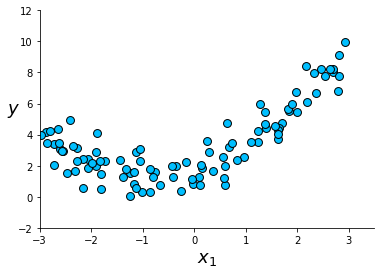

In [27]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1)-3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
axs = plt.subplot(1, 1, 1)
axs.spines['right'].set_visible(False)
axs.spines['top'  ].set_visible(False)

plt.scatter(X, y,color='#00bfff',s=250,marker='.',edgecolor='black')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3.5, -2, 12]);

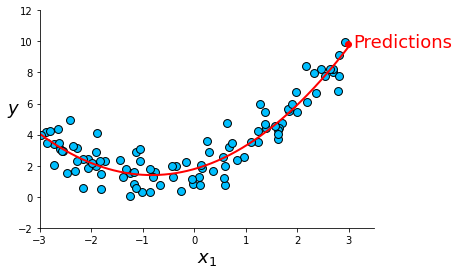

In [28]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2,include_bias=False)
X_poly        = poly_features.fit_transform(X)
lin_reg       = LinearRegression()
lin_reg.fit(X_poly, y)

X_new      = np.arange(-3.0, 3.0, .01).reshape(-1,1)
X_new_poly = poly_features.transform(X_new)
y_predict  = lin_reg.predict(X_new_poly)


axs = plt.subplot(1, 1, 1)
axs.spines['right'].set_visible(False)
axs.spines['top'  ].set_visible(False)

plt.scatter(X, y, color='#00bfff', s=250,marker='.', edgecolor='black')
plt.plot(X_new_poly[:,0], y_predict, "r-", linewidth=2, label="Predictions")
plt.scatter(X_new[-1,0], y_predict[-1]+0.2, color='r')
plt.text(X_new_poly[-1,0]+0.1, y_predict[-1]-0.02, "Predictions", size=18, c='r')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3.5, -2, 12]);

<font color="#9a083f"><h2>Bias-Variance Decomposition</h2></font>
Let’s talk a little about the error properties of linear regression prediction (in fact, this discussion is valid for all machine learning algorithms). We just covered the following:

- true value of the target variable is the sum of a deterministic function $f(x)$ and random error $ϵ$: $y=f(x)+ϵ$;

- error is normally distributed with zero mean and some variance: $ϵ∼N(0,σ2)$;

- true value of the target variable is also normally distributed: $y∼N(f(x),σ2)$;

- we try to approximate a deterministic but unknown function $f(x)$ using a linear function of the covariates $\hat{f}(x)$, which, in turn, is a point estimate of the function $f$ in function space (specifically, the family of linear functions that we have limited our space to), i.e. a random variable that has mean and variance.

So, the error at the point $x$ decomposes as follows:

$$
\begin{aligned}
\operatorname{Err}(\mathbf{x}) &=\mathbb{E}\left[(y-\widehat{f}(\mathbf{x}))^{2}\right] \\
&=\sigma^{2}+f^{2}+\operatorname{Var}(\widehat{f})+\mathbb{E}[\widehat{f}]^{2}-2 f \mathbb{E}[\widehat{f}] \\
&=(f-\mathbb{E}[\widehat{f}])^{2}+\operatorname{Var}(\widehat{f})+\sigma^{2} \\
&=\operatorname{Bias}(\widehat{f})^{2}+\operatorname{Var}(\widehat{f})+\sigma^{2}
\end{aligned}
$$

With that, we have reached our ultimate goal – the formula tells us that the forecast error of any model of type $y=f(x)+ϵ$ is composed of:

- squared bias: $Bias(\widehat{f})$ is the average error for all sets of data;

- variance: $Var(\widehat{f})$ is error variability, or by how much error will vary if we train the model on different sets of data;

- irremovable error: $σ^2$.

While we cannot do anything with the $σ^2$ term, we can influence the first two. Ideally, we’d like to negate both of these terms (upper left square of the picture), but, in practice, it is often necessary to balance between the biased and unstable estimates (high variance).

<center>
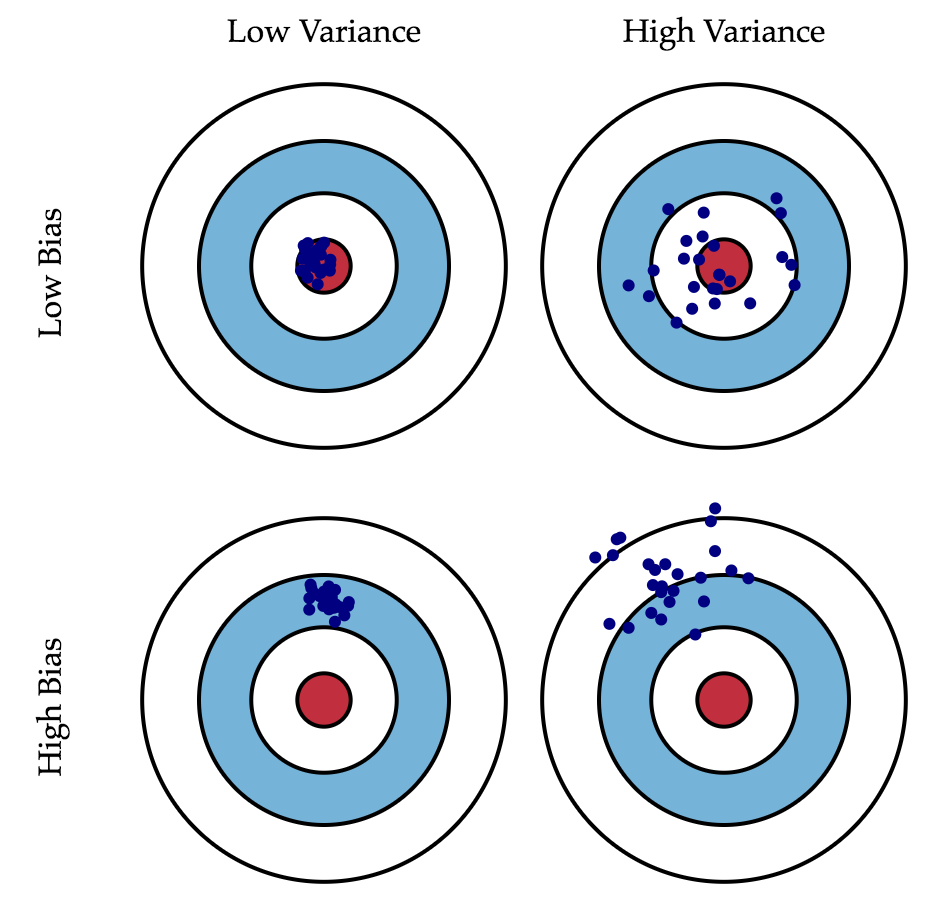
</center>

Generally, as the model becomes more computational (e.g. when the number of free parameters grows), the variance (dispersion) of the estimate also increases, but bias decreases. Due to the fact that the training set is memorized completely instead of generalizing, small changes lead to unexpected results (overfitting). On the other side, if the model is too weak, it will not be able to learn the pattern, resulting in learning something different that is offset with respect to the right solution.

<center>
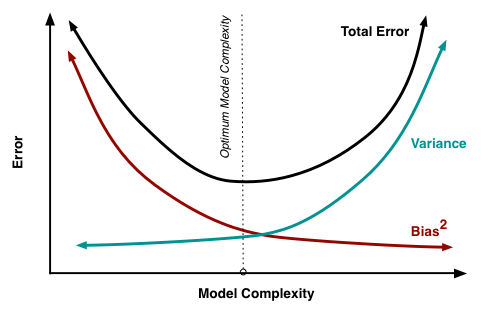
</center>

The Gauss-Markov theorem asserts that the OLS estimator of parameters of the linear model is the best for the class of linear unbiased estimator. This means that if there exists any other unbiased model $g$, from the same class of linear models, we can be sure that $Var(\widehat{f})≤Var(g)$.

If you perform high-degree Polynomial Regression, you will likely fit the training data much better than with plain Linear Regression. 

this high-degree Polynomial Regression model is severely overfitting the training data, while the linear model is underfitting it. The model that will generalize best in this case is the quadratic model.

In [29]:
# for install mlxtend library run this code
%pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
%pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 29.6 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

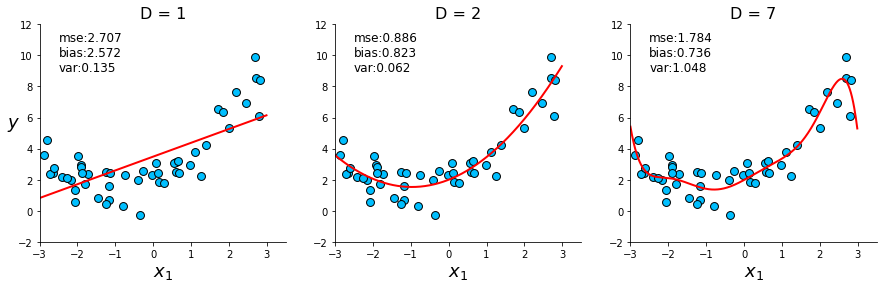

In [32]:
from mlxtend.evaluate import bias_variance_decomp

np.random.seed(42)
m = 50
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
for i in range(3):
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['top'].set_visible(False)

for i, deg in enumerate([1, 2, 7]):
    poly_features  = PolynomialFeatures(degree=deg, include_bias=False)
    X_poly         = poly_features.fit_transform(X)
    lin_reg        = LinearRegression()
    mse, bias, var = bias_variance_decomp(lin_reg, X_poly, y.ravel(), X_poly, y.ravel(),
                                         loss='mse', num_rounds=200, random_seed=1)
    lin_reg.fit(X_poly, y)
    
    X_new      = np.arange(-3.0, 3.0, .01).reshape(-1, 1)
    X_new_poly = poly_features.transform(X_new)
    y_predict  = lin_reg.predict(X_new_poly)
    
    axs[i].scatter(X, y, color='#00bfff', s=250, marker='.', edgecolor='black')
    axs[i].plot(X_new_poly[:, 0],
                y_predict,
                "r-",
                linewidth=2,
                label="Predictions")
    axs[i].set_xlabel("$x_1$", fontsize=18)
    axs[i].set_title(r"D = {}".format(deg), fontsize=16)
    axs[i].axis([-3, 3.5, -2, 12])
    axs[i].text(-2.5,
                9,
                f"mse:{mse:.3f}\nbias:{bias:.3f}\nvar:{var:.3f}",
                size=12)
axs[0].set_ylabel("$y$", rotation=0, fontsize=18);

#### Bias-Variance Tradeoff example $f(x)=x^3$

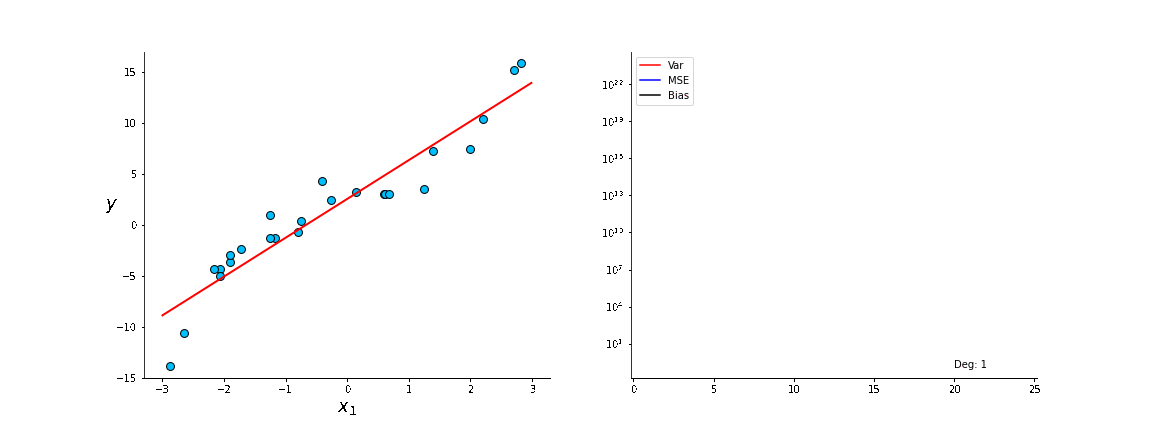


<font color="#e30b5d"><h1>Regularization</h1></font>

One of the major aspects of training your machine learning model is avoiding overfitting. The model will have a low accuracy if it is overfitting. This happens because your model is trying too hard to capture the noise in your training dataset. By noise we mean the data points that don’t really represent the true properties of your data, but random chance. Learning such data points, makes your model more flexible, at the risk of overfitting.


   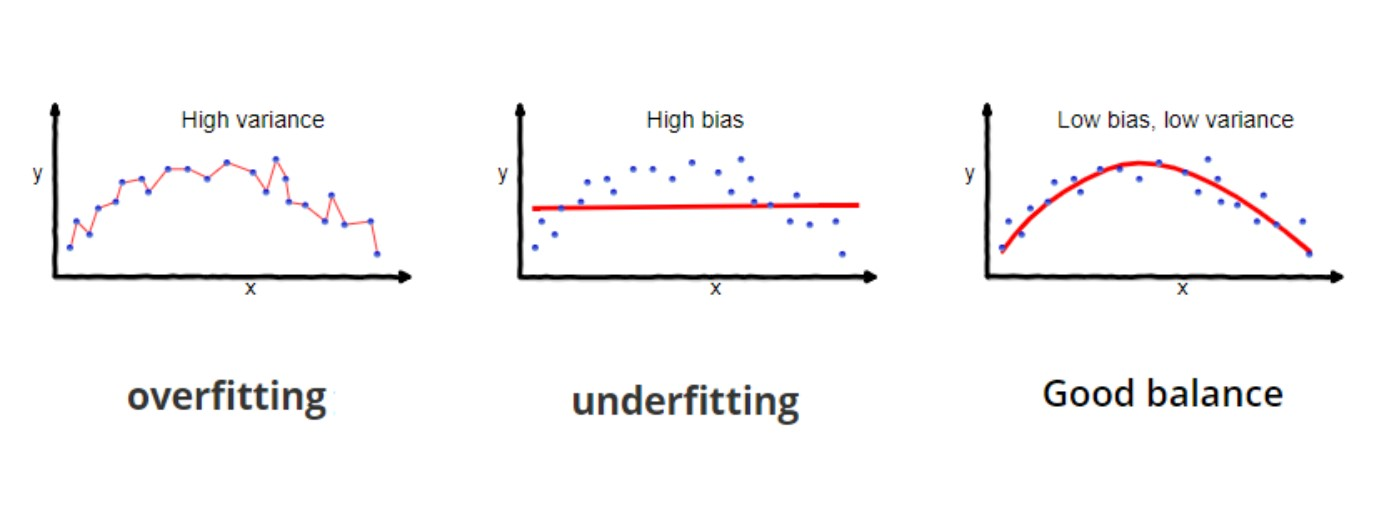
</center>



Ways to reduce overfitting in machine learning models:
- Simplifying model
- Regularization

Sometimes, by reducing the magnitude of the coefficients, we can acheive better results! In other words we can reduce overfitting on the train set and get a more generalized result! This is called Regularization.


**Formal Definition:**

Regularization is a technique used for tuning the function by adding an additional penalty term in the error function. The additional term controls the excessively fluctuating function such that the coefficients don't take extreme values.

We use bellow loss function for fitting regression model:

$$ RSS = \sum_{i=1}^{n}(y_{ij}-\beta_0 -\sum_{j=1}^{p}(\beta_jx_{ij})) $$



This will adjust the coefficients based on your training data. If there is noise in the training data, then the estimated coefficients won’t generalize well to the future data. This is where regularization comes in and shrinks or regularizes these learned estimates towards zero.

Two common regularization methods for linear regression are :

- Ridge

$$ RSS + \lambda \sum_{j=1}^{p}\beta_j^2 $$

- Lasso

$$ RSS + \lambda \sum_{j=1}^{p}\left\lvert {\beta_j} \right\rvert $$


<center>
<img src=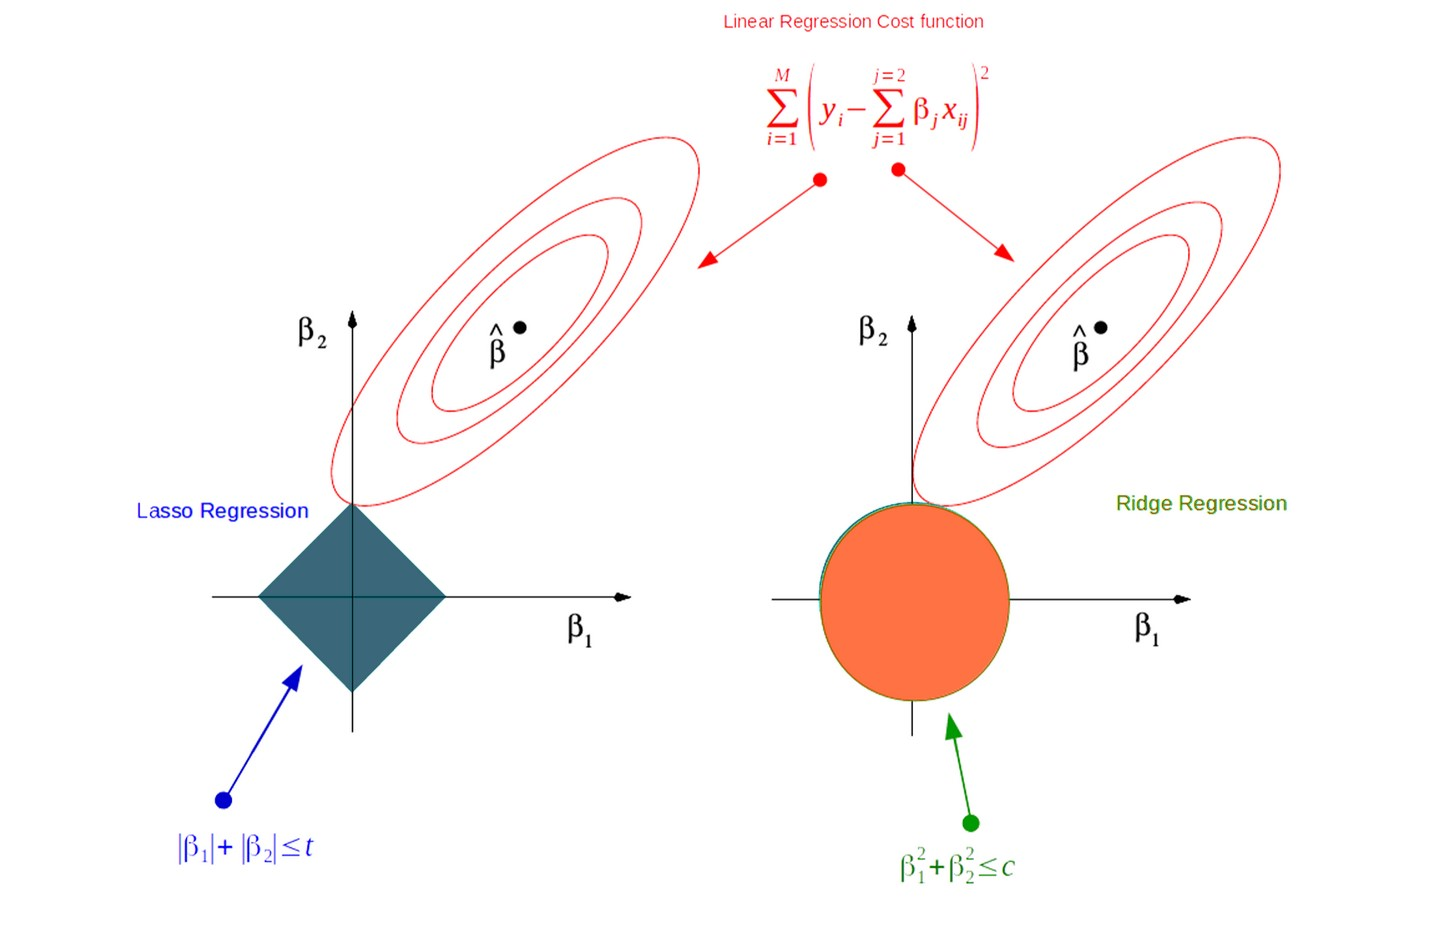 "width="500px"
/>

</center>

Points on the ellipse share the value of RSS. For a very large value of t and c, the blue and orange regions will contain the center of the ellipse, making coefficient estimates of both regression techniques, equal to the least squares estimates. But, this is not the case in the above image. In this case, the lasso and ridge regression coefficient estimates are given by the ﬁrst point at which an ellipse contacts the constraint region. Since ridge regression has a circular constraint with no sharp points, this intersection will not generally occur on an axis, and so the ridge regression coeﬃcient estimates will be exclusively non-zero. However, the lasso constraint has corners at each of the axes, and so the ellipse will often intersect the constraint region at an axis. When this occurs, one of the coeﬃcients will equal zero. In higher dimensions(where parameters are much more than 2), many of the coeﬃcient estimates may equal zero simultaneously.

* This sheds light on the obvious disadvantage of ridge regression, which is model interpretability. It will shrink the coefficients for least important predictors, very close to zero. But it will never make them exactly zero. In other words, the final model will include all predictors. However, in the case of the lasso, the L1 penalty has the eﬀect of forcing some of the coeﬃcient estimates to be exactly equal to zero when the tuning parameter λ is suﬃciently large. Therefore, the lasso method also performs variable selection and is said to yield sparse models.

<font color="#9a083f"><h2>Regularization on Medical cost dataset</h2></font>

In [33]:
# Import dataset
df = pd.read_csv('insurance.csv')
#Lets look into top few rows and columns in the dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [34]:
# Dummy variable
categorical_columns = ['sex','children', 'smoker', 'region']
df_encode = pd.get_dummies(data = df, prefix = 'OHE', prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
              dtype='int8')
## Log transform
df_encode['charges'] = np.log(df_encode['charges'])

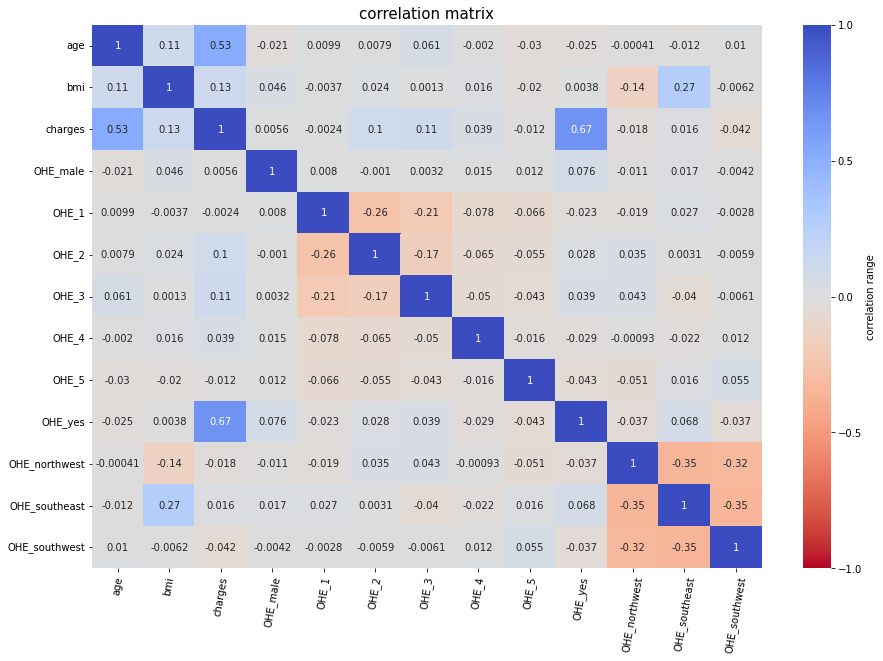

In [35]:
import seaborn as sns
plt.figure(figsize=(15,10))
corr_matx = df_encode.corr()
ax=sns.heatmap(data=corr_matx , cmap='coolwarm_r',vmin=-1 , vmax=+1,
            annot=True,cbar_kws={'label': 'correlation range'})
cbar = ax.collections[0].colorbar
cbar.set_ticks([-1,-.5,0, .5, 1])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 80);
ax.set_title('correlation matrix',size=15);


In [36]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

X = df_encode.iloc[:, :-1] #independent variables
y = df_encode.iloc[:, -1] #dependent variable

reg    = LinearRegression()
reg_cv = cross_validate(reg, X, y, scoring='neg_mean_squared_error', cv=5, return_estimator=True)
print(np.mean(reg_cv['test_score']))

-0.12132030447895889


<font color="#9a083f"><h3>Ridge Regression</h3></font>

GridSearch is helpful for searching for best hyperparameters

In [38]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge      = Ridge()
parameters = {'alpha':[1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}
reg_ridge  = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)

reg_ridge.fit(X, y)
print(reg_ridge.best_params_)
print(reg_ridge.best_score_)

{'alpha': 5}
-0.12126648018812067


<font color="#9a083f"><h3>Lasso Regression</h3></font>

In [39]:
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings('ignore')

lasso      = Lasso()
parameters = {'alpha':[ 1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}
reg_lasso  = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)

reg_lasso.fit(X, y)
print(reg_lasso.best_params_)
print(reg_lasso.best_score_)

{'alpha': 0.001}
-0.121030901943045


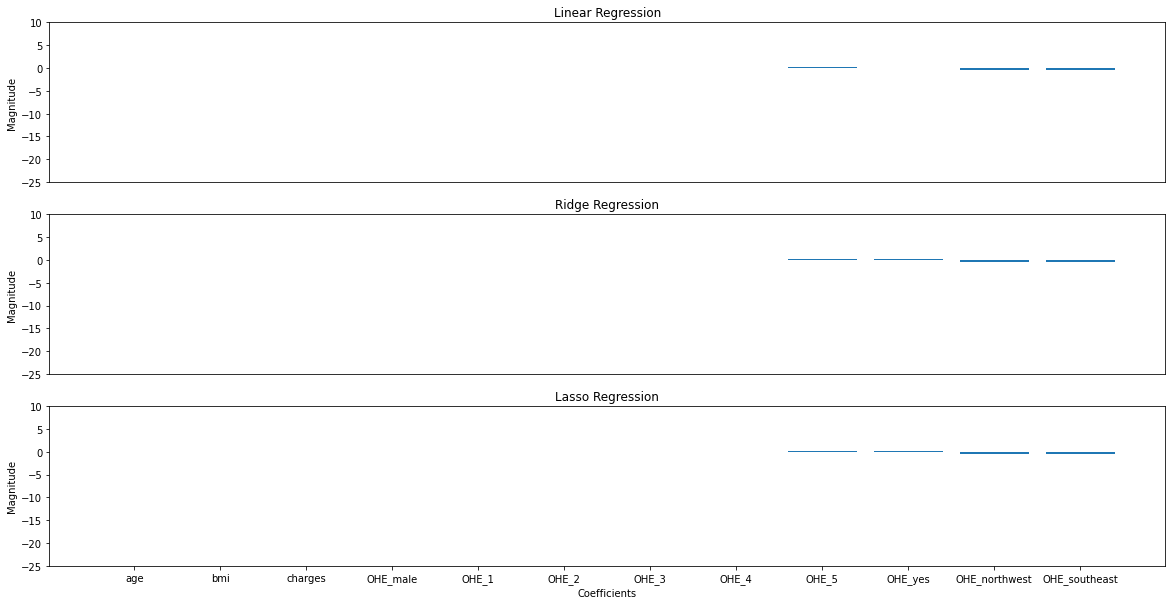

In [40]:
plt.figure(figsize=(20, 10))

plt.subplot(3, 1, 1)
plt.bar(df_encode.columns[:-1],reg_cv['estimator'][2].coef_)
plt.ylim([-25, 10])
plt.xticks([])
plt.title('Linear Regression')
plt.ylabel('Magnitude')

plt.subplot(3, 1, 2)
plt.bar(df_encode.columns[:-1],reg_ridge.best_estimator_.coef_)
plt.ylim([-25, 10])
plt.xticks([])
plt.title('Ridge Regression')
plt.ylabel('Magnitude')

plt.subplot(3, 1, 3)
plt.bar(df_encode.columns[:-1],reg_lasso.best_estimator_.coef_)
plt.ylim([-25, 10])
plt.title('Lasso Regression')
plt.xlabel('Coefficients')
plt.ylabel('Magnitude');